In [21]:
# filter and check runs
import pandas as pd
from pathlib import Path
import numpy as np

def make_hash_columns(df, colname):
    df[colname + ".stem"] = df[colname].apply(lambda x: Path(x).stem)
    df[colname + ".hash"] = df[colname + ".stem"].apply(lambda x: x.split("_")[-1][:8])
    return df

models = ["cifar_vgg_16"]  #, "cifar_resnet_20_64"]
datasets = ["cifar10", "cifar100class10", "pixelpermutedcifar10", "svhn", "eurosat"]
branches = ["main", "transport_mask", "one_shot"]
replicates = list(range(1, 3))

runs = pd.read_csv("../refactor-outputs/run-hparams.csv")
runs = make_hash_columns(runs, "Path")
filter = (runs['Dataset.dataset_name'].isin(datasets)) &  \
        (runs['Pretraining Training.training_steps'] == "5ep") &  \
        (runs['Model.model_name'].isin(models))
filtered_runs = runs.loc[filter]
print(filtered_runs)

     Unnamed: 0                                               Path  \
103         103  /home/mila/d/devin.kwok/scratch/open_lth_data/...   
104         104  /home/mila/d/devin.kwok/scratch/open_lth_data/...   
133         133  /home/mila/d/devin.kwok/scratch/open_lth_data/...   
136         136  /home/mila/d/devin.kwok/scratch/open_lth_data/...   
137         137  /home/mila/d/devin.kwok/scratch/open_lth_data/...   

     Dataset.dataset_name  Dataset.batch_size Model.model_name  \
103               eurosat                 128     cifar_vgg_16   
104  pixelpermutedcifar10                 128     cifar_vgg_16   
133       cifar100class10                 128     cifar_vgg_16   
136               cifar10                 128     cifar_vgg_16   
137                  svhn                 128     cifar_vgg_16   

    Model.model_init Model.batchnorm_init Pretraining Dataset.dataset_name  \
103   kaiming_normal              uniform                          eurosat   
104   kaiming_normal      

In [18]:
run_acc = pd.read_csv("../refactor-outputs/branch-test-acc.csv")
run_acc = make_hash_columns(run_acc, "experiment")
run_acc = make_hash_columns(run_acc, "branch")
run_acc = run_acc.loc[run_acc["experiment.hash"].isin(filtered_runs["Path.hash"])]
run_acc["model"] = run_acc["experiment.hash"].apply(lambda x: filtered_runs.loc[x == filtered_runs["Path.hash"], "Model.model_name"].item())
run_acc["dataset"] = run_acc["experiment.hash"].apply(lambda x: filtered_runs.loc[x == filtered_runs["Path.hash"], "Dataset.dataset_name"].item())
run_acc["branch.name"] = run_acc["branch"].apply(lambda x: x if x == "main" else x[len(x.split("_")[0])+len(x.split("_")[1])+2:-len(x.split("_")[-1])-1])
run_acc["perm_type"] = run_acc["pruning_permutation"].apply(lambda x: None if str(x) == "nan" or str(x) == "None" else ("file" if "level_0" in x[-16:] else "level"))

In [19]:
filtered_acc = run_acc.loc[(run_acc["level"] != "level_pretrain") & (~run_acc["test_loss"].isna()) & (run_acc["branch.name"] != "copy_permuted_mask_to_prune")]

baseline = filtered_acc.loc[(filtered_acc["branch.name"] == "one_shot")]
control = filtered_acc.loc[(filtered_acc["perm_type"].isna()) & (filtered_acc["branch.name"] == "transport_mask")]
previous = filtered_acc[filtered_acc["perm_type"] == "level"]
ours = filtered_acc[filtered_acc["perm_type"] == "file"]
gold_standard = filtered_acc.loc[filtered_acc["branch.name"] == "main"]

summary_columns = ["branch.name", "model", "dataset", "replicate", "level", "test_accuracy"]
print(baseline.dataset.unique())
# for i, x in baseline[baseline["dataset"] == "cifar10"].iterrows():
#     print(i, x)
# print(control[summary_columns])
# print(previous[summary_columns])
# print(ours[summary_columns])
# print(gold_standard[summary_columns])

['eurosat' 'pixelpermutedcifar10' 'cifar100class10' 'svhn']


cifar100class10 cifar_vgg_16
cifar_vgg_16 cifar100class10       Unnamed: 0                                         experiment  \
5248        5248  /home/mila/d/devin.kwok/scratch/open_lth_data/...   
5257        5257  /home/mila/d/devin.kwok/scratch/open_lth_data/...   
5263        5263  /home/mila/d/devin.kwok/scratch/open_lth_data/...   
5272        5272  /home/mila/d/devin.kwok/scratch/open_lth_data/...   
5278        5278  /home/mila/d/devin.kwok/scratch/open_lth_data/...   
5287        5287  /home/mila/d/devin.kwok/scratch/open_lth_data/...   
5293        5293  /home/mila/d/devin.kwok/scratch/open_lth_data/...   
5302        5302  /home/mila/d/devin.kwok/scratch/open_lth_data/...   
5308        5308  /home/mila/d/devin.kwok/scratch/open_lth_data/...   
5314        5314  /home/mila/d/devin.kwok/scratch/open_lth_data/...   
5322        5322  /home/mila/d/devin.kwok/scratch/open_lth_data/...   
5331        5331  /home/mila/d/devin.kwok/scratch/open_lth_data/...   
5337        5337  /

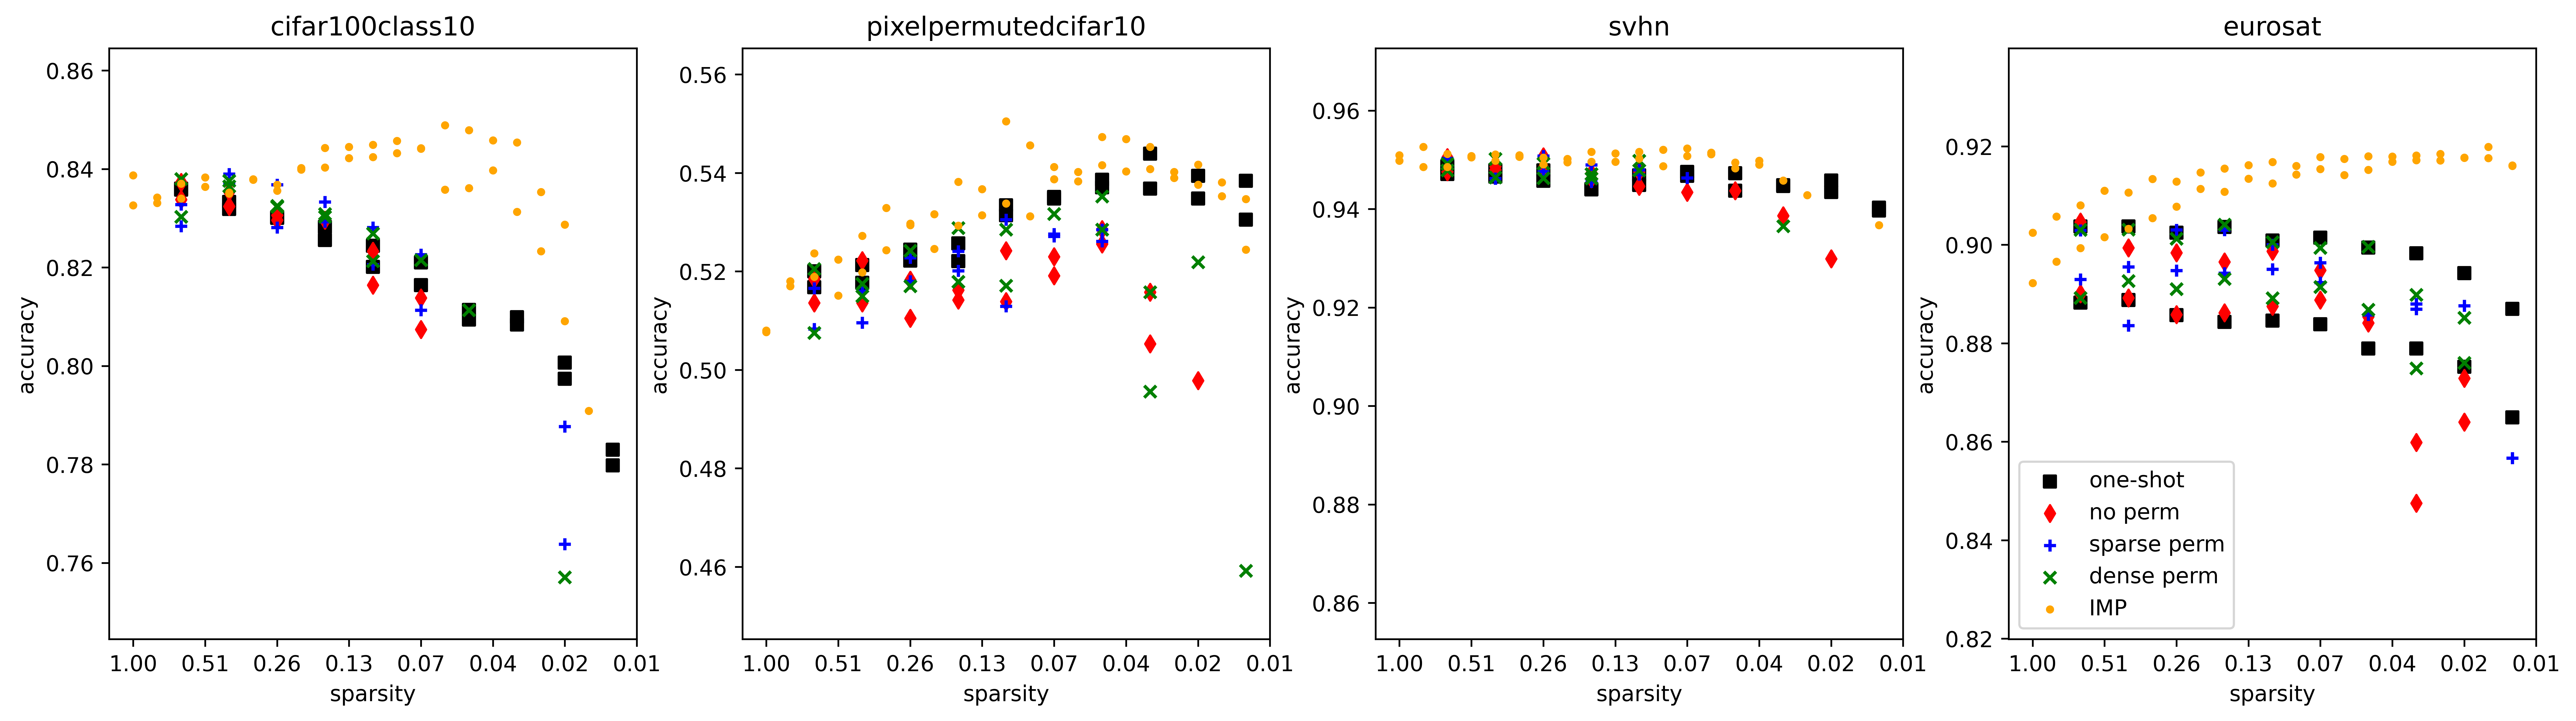

cifar100class10 cifar_vgg_16
cifar_vgg_16 cifar100class10       Unnamed: 0                                         experiment  \
5248        5248  /home/mila/d/devin.kwok/scratch/open_lth_data/...   
5257        5257  /home/mila/d/devin.kwok/scratch/open_lth_data/...   
5263        5263  /home/mila/d/devin.kwok/scratch/open_lth_data/...   
5272        5272  /home/mila/d/devin.kwok/scratch/open_lth_data/...   
5278        5278  /home/mila/d/devin.kwok/scratch/open_lth_data/...   
5287        5287  /home/mila/d/devin.kwok/scratch/open_lth_data/...   
5293        5293  /home/mila/d/devin.kwok/scratch/open_lth_data/...   
5302        5302  /home/mila/d/devin.kwok/scratch/open_lth_data/...   
5308        5308  /home/mila/d/devin.kwok/scratch/open_lth_data/...   
5314        5314  /home/mila/d/devin.kwok/scratch/open_lth_data/...   
5322        5322  /home/mila/d/devin.kwok/scratch/open_lth_data/...   
5331        5331  /home/mila/d/devin.kwok/scratch/open_lth_data/...   
5337        5337  /

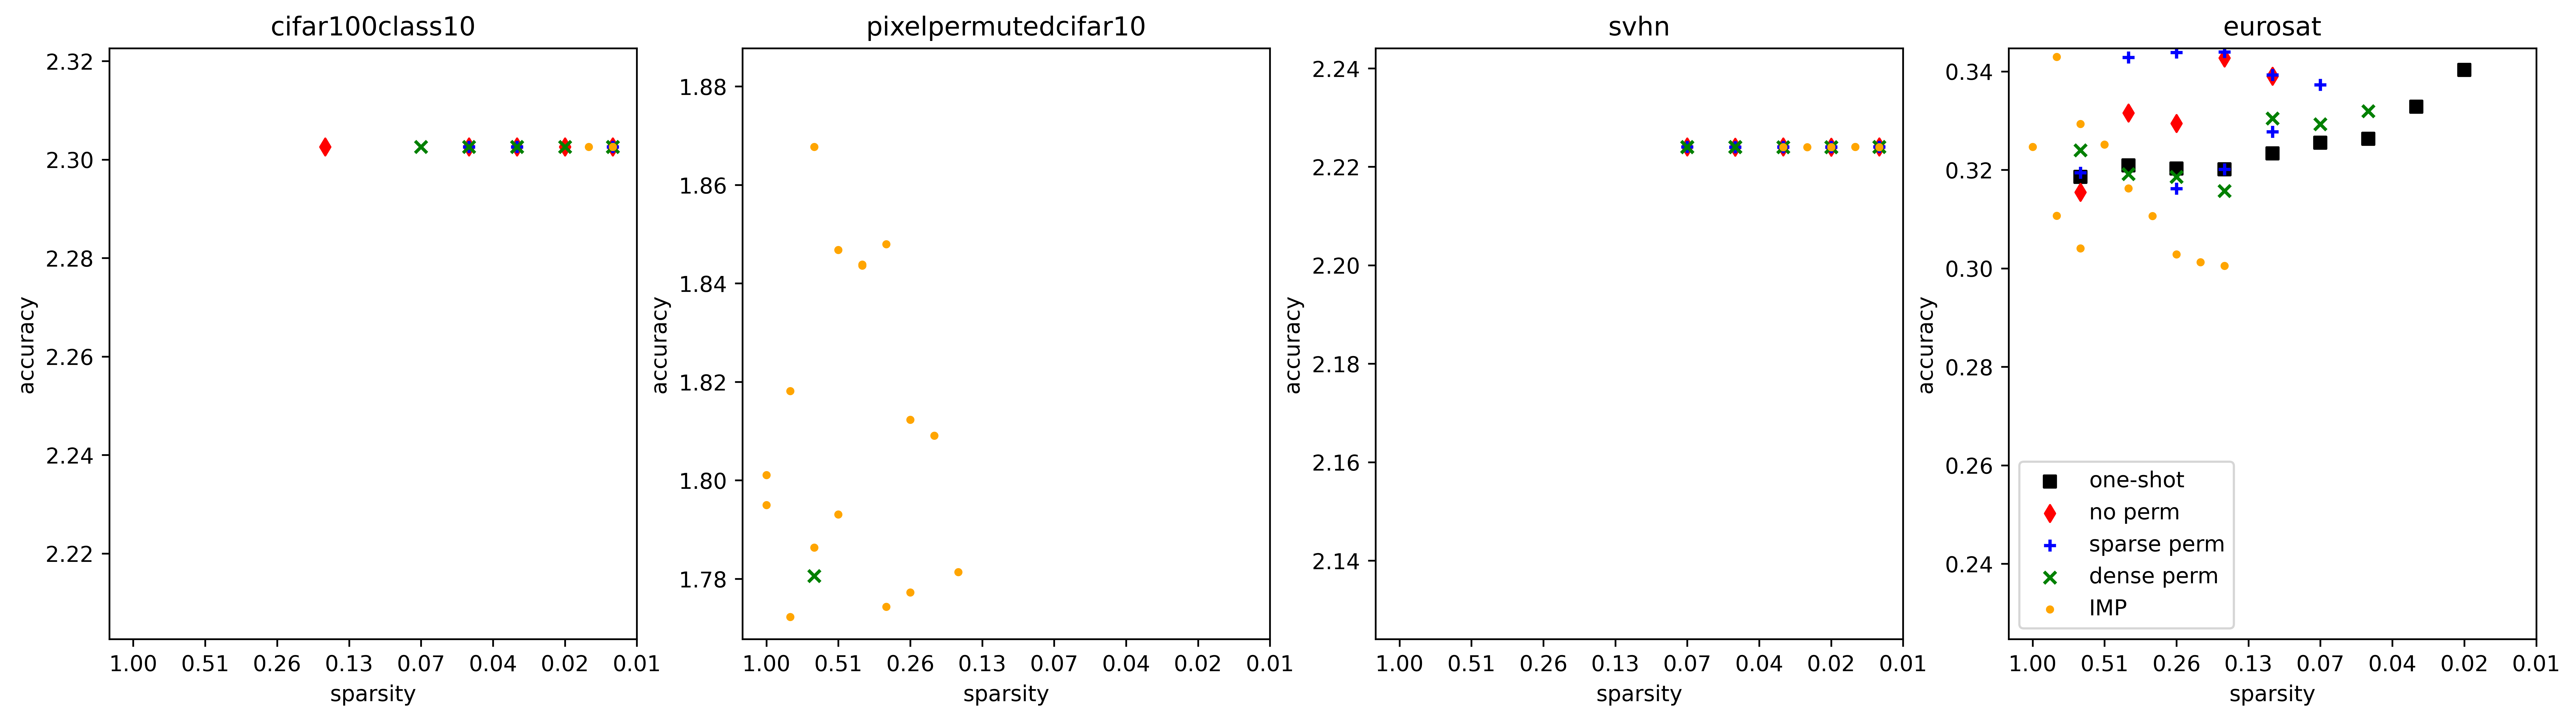

In [19]:
import matplotlib.pyplot as plt

def xy_std_mean(df, model, dataset, replicate, y_col="test_loss"):
    subset_df = df.loc[(df["model"] == model) & (df["dataset"] == dataset)]
    print(model, dataset, subset_df)
    subset_df = subset_df.loc[(subset_df["replicate"] == f"replicate_{replicate}")]
    #TODO return std_mean
    # for rep in subset_df["replicate"].unique():
    x = np.array(subset_df["level"].apply(lambda x: int(x.split("_")[1])))
    sort_idx = np.argsort(x)
    y = np.array(subset_df[y_col])
    y[y < 0.3] = float("NaN")
    return x[sort_idx], y[sort_idx]

def plot_acc_vs_sparsity(title, x, y, ax, color, marker, label):
    ax.scatter(x, y, c=color, alpha=1., marker=marker, label=label, s=30)
    ax.set_title(title)
    ax.set_ylabel("accuracy")
    ax.set_xlabel("sparsity")
    xticks = list(range(0, 22, 3))
    ax.set_xticks(xticks)
    ax.set_xticklabels([f"{(0.8**i):0.2f}" for i in xticks])
    ax.set_ylim((max(y) - 0.1, max(y) + 0.02))

def plot_acc(y_col):
    fig, ax_matrix = plt.subplots(nrows=len(models), ncols=len(datasets), figsize=(5*len(datasets), 5*len(models)), dpi=600)
    # for axes, model in zip(ax_matrix, models):
    for model in models:
        for ax, dataset in zip(ax_matrix, datasets):
            print(dataset, model)
            for replicate in replicates:
                plot_acc_vs_sparsity(dataset, *xy_std_mean(baseline, model, dataset, replicate, y_col), ax, "black", "s", "one-shot" if replicate==1 else None)
            for replicate in replicates:
                plot_acc_vs_sparsity(dataset, *xy_std_mean(control, model, dataset, replicate, y_col), ax, "red", "d", "no perm" if replicate==1 else None)
            for replicate in replicates:
                plot_acc_vs_sparsity(dataset, *xy_std_mean(previous, model, dataset, replicate, y_col), ax, "blue", "+", "sparse perm" if replicate==1 else None)
            for replicate in replicates:
                plot_acc_vs_sparsity(dataset, *xy_std_mean(ours, model, dataset, replicate, y_col), ax, "green", "x", "dense perm" if replicate==1 else None)
            for replicate in replicates:
                plot_acc_vs_sparsity(dataset, *xy_std_mean(gold_standard, model, dataset, replicate, y_col), ax, "orange", ".", "IMP" if replicate==1 else None)
    plt.legend()
    plt.show()

plot_acc("test_accuracy")
plot_acc("test_loss")